In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
import pandas as pd
from matplotlib import rc
import os.path as path
import os


Álgebra Lineal

3.

In [2]:
def Multiplica(m_1, m_2):
    resp=np.dot(m_1,m_2)
    
    return resp

In [5]:
a=np.array([[1,0,0],[5,1,0],[-2,3,1]])
b=np.array([[4,-2,1],[0,3,7],[0,0,2]])

a,b

(array([[ 1,  0,  0],
        [ 5,  1,  0],
        [-2,  3,  1]]),
 array([[ 4, -2,  1],
        [ 0,  3,  7],
        [ 0,  0,  2]]))

In [6]:
Multiplica(a,b)

array([[ 4, -2,  1],
       [20, -7, 12],
       [-8, 13, 21]])

4.

Sustitución hacia adelante:

Partiendo de un sistema de ecuaciones $Ax=b$ se utiliza la factorización $LU$ para tener $A=LU$, donde $L$ es una matriz triangular superior y $U$ es una matriz triangular inferior. Para la sustitución hacia adelante se utiliza la matriz triangular inferior. De modo que se tiene,

$$\begin{pmatrix}
L_{00} & 0 & 0 & \cdots & \cdots & 0 & 0\\
L_{10} & L_{11} & 0 & \cdots & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
L_{i1} & L_{i2} & \cdots & L_{ii} & 0 &\cdots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
L_{n1} & L_{n2} & \cdots & \cdots &\cdots &\cdots & L_{nn}
\end{pmatrix}
\begin{pmatrix}
x_{0} \\
x_{1} \\
\vdots \\
x_{i}\\
\vdots \\
x_{n}
\end{pmatrix}
=
\begin{pmatrix}
b_{0} \\
b_{1} \\
\vdots \\
b_{i}\\
\vdots \\
b_{n}
\end{pmatrix}$$
$$ $$
De modo que los sistemas de ecuaciones estarían dados por,


$$b_{0}=L_{00}x_{0}$$
$$x_{0}=\frac{b_{0}}{L_{00}}$$
$$ $$
$$b_{1}=L_{10}x_{0} + L_{11}x_{1}$$
$$x_{1}=\frac{b_{1}-L_{10}x_{0}}{L_{11}}$$
$$\cdots$$
$$b_{i}=L_{i0}x_{0} + L_{i1}x_{1}+\cdots+L_{ii}x_{i}$$
$$x_{i}=\frac{b_{i}-L_{i0}x_{0}-L_{i1}x_{1} - \cdots - L_{i i-1}x_{i-1}}{L_{ii}}$$
$$ $$
Obteniendo la fórmula de sustitución hacia adelante:

$$x_{i}= \frac{b_{i} -\sum_{j=0}^{i-1}L_{ij}x_{j}}{L_{ii}}$$




5.

Sustitución hacia atras:

Como se mencionó en el punto anterior, se hace uso de la factorización $LU$, pero en el caso de la sustitución hacia atrás, se utiliza la matriz triangular superior. De modo que se tiene,

$$\begin{pmatrix}
L_{11} & L_{12} & L_{13} & \cdots & \cdots & L_{1 n-1} & L_{1n}\\
0 & L_{22} & L_{23} & \cdots & \cdots & L_{2 n-1} & L_{2n}\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
0 & 0 & \cdots & L_{ii} & L_{i i+1} &\cdots & L_{in}\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
0 & 0 & \cdots & \cdots &\cdots &\cdots & L_{nn}
\end{pmatrix}
\begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{i}\\
\vdots \\
x_{n}
\end{pmatrix}
=
\begin{pmatrix}
b_{1} \\
b_{2} \\
\vdots \\
b_{i}\\
\vdots \\
b_{n}
\end{pmatrix}$$

De modo que los sistemas de ecuaciones estarían dados por,


$$b_{0}=L_{00}x_{0}+L_{01}x_{1}+\cdots+L_{0n}x_{n}$$
$$x_{0}=\frac{b_{0}-L_{01}x_{1}-\cdots-L_{0 n}x_{n}}{L_{00}}$$
$$ $$
$$b_{1}=L_{11}x_{1}+L_{12}x_{2}+\cdots+L_{1n}x_{n}$$
$$x_{1}=\frac{b_{1}-L_{12}x_{2}-\cdots-L_{1 n}x_{n}}{L_{11}}$$
$$\cdots$$
$$b_{i}=L_{ii}x_{i}+\cdots+L_{in}x_{n}$$
$$x_{i}=\frac{b_{i}-L_{i i+1}x_{i+1}-\cdots-L_{i n}x_{n}}{L_{ii}}$$


Obteniendo la fórmula de sustitución hacia adelante:

$$x_{i}= \frac{b_{i} -\sum_{j=i+1}^{n}L_{ij}x_{j}}{L_{ii}}$$


6.

7.

In [4]:
A=np.array([[4,-2,1],[20,-7,12],[-8,13,17]])
A

array([[ 4, -2,  1],
       [20, -7, 12],
       [-8, 13, 17]])

In [28]:
n = len(A)
L = np.eye(n)
U = np.copy(A)
L

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [29]:
for j in range(n-1):
    for i in range(j+1, n):
        valor = U[i, j] / U[j, j]
        L[i, j] = valor
        U[i, j:] = U[i, j:] - valor * U[j, j:]

In [30]:
L,U

(array([[ 1.,  0.,  0.],
        [ 5.,  1.,  0.],
        [-2.,  3.,  1.]]),
 array([[ 4, -2,  1],
        [ 0,  3,  7],
        [ 0,  0, -2]]))

9.

a)

In [41]:
A=np.array([[4,1,1],[1,3,2],[1,2,5]])
b=np.array([1.,3.,7.])

In [ ]:
def Jacobi(A,b,x0, itmax=1000, tolerancia= 1e-9):
    
    x = x0.copy()
    
    for it in range(itmax):
        
        xn = np.zeros_like(x0)
        
        for i in range(A.shape[0]):
            
            sum_ = 0.
            
            for j in range(A.shape[1]):
                
                if j!=i:
                    sum_ += A[i,j]*x[j]
                    
            xn[i] = (b[i] - sum_)/A[i,i]
            
        print(it,xn)
        
        residuo = np.linalg.norm( np.dot(A,xn) - b )
        x = xn.copy()
        #print(residuo)
        
        if np.allclose(residuo,tolerancia,atol=tolerancia):
            break
        
    return x


In [ ]:
x0 = np.array([0.,0.,0.])
Jacobi(A,b,x0)

In [36]:
def GetJacobiEig(A, it=1000):
    n = A.shape[0]
    #Matriz para los valores propios.
    D = A.copy()
    #Matriz para los vectores propios.
    B = -np.eye(n)
     
    #Encontrar los índices del máximo elemento no diagonal. 
    for k in range(it):
        max_index = (0, 0)
        max_value = 0
        for i in range(n):
            for j in range(i+1, n):
                value = np.abs(D[i][j])
                if value > max_value:
                    max_value = value
                    max_index = (i,j)
        
        #Indice de la fila.          
        i = max_index[0]
        #Indice de la columna.
        j = max_index[1]

        #Se calcula el ángulo de rotación teniendo en cuenta los signos del cuadrante.
        if D[i][i] == D[j][j]:
            theta = np.pi / 4
        else:
            t = (2 * D[i][j]) / (D[j][j] - D[i][i]) 
            if t >= 0:
                theta = 0.5 * np.tan(t)
            else:
                theta = 0.5 * np.tan(t) + np.pi
        #Se asignan los valores para la matriz de rotación.
        R = np.eye(n)
        R[i][i] = np.cos(theta)
        R[j][j] = np.cos(theta)
        R[i][j] = np.sin(theta)
        R[j][i] = -np.sin(theta)

        #Se actualizan las matrices D y B
        #Para los valores propios será el producto punto entre la transpuesta de R, y el producto punto de D y R.
        D = np.dot(R.T, np.dot(D, R))
        #Para los vectores propios será el producto punto de la matriz B existente y R.
        B = np.dot(B, R)


    #Los valores propios serán la diagonal de la matriz D.
    eigen_values = np.diag(D)
    #Los vectores propios serán la matriz B.
    eigen_vectors = B

    return eigen_values, eigen_vectors

In [37]:
C = np.array([[4,1,1],[1,3,2],[1,2,5]])
values,vectors = GetJacobiEig(C)

values,vectors



(array([6.89510652, 3.39729507, 1.70759841]),
 array([[-0.43170413,  0.88573564, -0.17059871],
        [-0.49725362, -0.07589338,  0.86427949],
        [-0.75257583, -0.45794385, -0.47319874]]))

In [17]:
print("Mediante el método de Jacobi los valores propios de la matriz son {} \n y sus repectivos vectores propios:\n {}".format(values,vectors))

Mediante el método de Jacobi los valores propios de la matriz son [6.89510652 3.39729507 1.70759841] 
 y sus repectivos vectores propios:
 [[-0.43170413  0.88573564 -0.17059871]
 [-0.49725362 -0.07589338  0.86427949]
 [-0.75257583 -0.45794385 -0.47319874]]


b)

In [14]:
resp=np.linalg.eig(A)
resp

(array([6.89510652, 3.39729507, 1.70759841]),
 array([[ 0.43170413,  0.88573564,  0.17059871],
        [ 0.49725362, -0.07589338, -0.86427949],
        [ 0.75257583, -0.45794385,  0.47319874]]))

10.

In [2]:
H = np.array([[1, 2, -1], [1,0, -1], [4, -4, 5]])
x0 = np.array([1, 1, 1])

H

array([[ 1,  2, -1],
       [ 1,  0, -1],
       [ 4, -4,  5]])

C:\Users\lsper\AppData\Local\Temp/ipykernel_1348/2796448148.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  newl=new[c]/old[c]


(4.372281323269014, array([ 0.42753829,  0.29335141, -0.85507658]))

12.

a)

In [19]:
x=sym.Symbol('x',real=True)

h=sym.Symbol('h',real=True)

X=[-2*h,-1*h,0*h,1*h,2*h]

def Lagrange(x,xi,j):
    
    prod = 1
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [20]:
def GetCoefficients(x,p,X):
    coefficients=[]
    
    for i in range(len(X)):
        Li=Lagrange(x,X,i)
        
        dLi=sym.diff(Li,x,1)
        
        C=dLi.subs(x,X[p])
        
        coefficients.append(C)
        
    return coefficients

In [21]:
coef=GetCoefficients(x,0,X)
coef

[-25/(12*h), 4/h, -3/h, 4/(3*h), -1/(4*h)]

In [36]:
def GetJacobian_4(G,r,h):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (G[i]( r[0] - 2*h,r[1],r[2]) - 8*G[i]( r[0] - h,r[1],r[2])+8*G[i]( r[0] +h,r[1],r[2]) - G[i]( r[0] + 2*h,r[1],r[2]))/(12*h)
        J[i,1] = (G[i]( r[0] ,r[1]-2*h,r[2]) - 8*G[i]( r[0],r[1]-h,r[2])+8*G[i]( r[0] ,r[1]+h,r[2]) - G[i]( r[0],r[1]+2*h,r[2]))/(12*h)
        J[i,2] = (G[i]( r[0],r[1],r[2]-2*h) - 8*G[i]( r[0],r[1],r[2]-h)+8*G[i]( r[0],r[1],r[2]+h) - G[i]( r[0],r[1],r[2]+2*h))/(12*h)
        
    return J.T



b)

In [37]:
G=(lambda x_1,x_2,x_3: 6*x_1 - 2*np.cos(x_2*x_3) - 1., \
    lambda x_1,x_2,x_3: 9*x_2 + (x_1**2 + np.sin(x_3) + 1.06)**(1/2) +0.9, \
    lambda x_1,x_2,x_3: 60*x_3 + 3*np.e**(-x_1*x_2)+10*np.pi -3)

In [38]:
GetJacobian_4(G,(0.5,0.5,0.5),0.01)


array([[ 6.        ,  0.37377753, -1.16820117],
       [ 0.24740396,  9.        , -1.16820117],
       [ 0.24740396,  0.32802064, 60.        ]])

c)

In [42]:
def GetJacobian_2(G,r,h):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (G[i]( r[0] + h,r[1],r[2]) - G[i]( r[0] - h,r[1],r[2]))/(2*h)
        J[i,1] = (G[i]( r[0] ,r[1]+h,r[2]) - G[i]( r[0],r[1]-h,r[2]))/(2*h)
        J[i,2] = (G[i]( r[0],r[1],r[2]+h) - G[i]( r[0],r[1],r[2]-h))/(2*h)
        
    return J.T

GetJacobian_2(G,(0.5,0.5,0.5),0.01)

array([[ 6.        ,  0.37377753, -1.16820117],
       [ 0.24740396,  9.        , -1.16820117],
       [ 0.24740396,  0.32802064, 60.        ]])

Usando $h=0.00001$ se logra igualar en precisión al operador de cuarto orden.

In [44]:
GetJacobian_2(G,(0.5,0.5,0.5),0.00001)

array([[ 6.        ,  0.37377753, -1.16820117],
       [ 0.24740396,  9.        , -1.16820117],
       [ 0.24740396,  0.32802064, 60.        ]])

13.

In [3]:
J_x=sym.matrices.Matrix([[0,0,0],[0,0,-1],[0,1,0]])
J_y=sym.matrices.Matrix([[0,0,1],[0,0,0],[-1,0,0]])
J_z=sym.matrices.Matrix([[0,-1,0],[1,0,0],[0,0,0]])

J_x,J_y,J_z

(Matrix([
 [0, 0,  0],
 [0, 0, -1],
 [0, 1,  0]]),
 Matrix([
 [ 0, 0, 1],
 [ 0, 0, 0],
 [-1, 0, 0]]),
 Matrix([
 [0, -1, 0],
 [1,  0, 0],
 [0,  0, 0]]))

Realizando todas las posibles combinaciones para A y B a partir de J_x, J_y, J_z:


Para J_x y J_y:

In [4]:
J_x*J_y - J_y*J_x

Matrix([
[0, -1, 0],
[1,  0, 0],
[0,  0, 0]])

Se cumple que  $[J_{x},J_{y}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=1$ y 
$$J_{z}=\begin{pmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} $$

Para J_x y J_z:

In [6]:
J_x*J_z - J_z*J_x

Matrix([
[0, 0, -1],
[0, 0,  0],
[1, 0,  0]])

Se cumple que  $[J_{x},J_{z}]=\epsilon_{ijk}J_{y}$ ya que $\epsilon_{xyz}=-1$ y 
$$J_{y}=\begin{pmatrix}
0 & 0 & 1 \\
0 & 0 & 0 \\
-1 & 0 & 0
\end{pmatrix} $$

Para J_y y J_x:

In [7]:
J_y*J_x - J_x*J_y

Matrix([
[ 0, 1, 0],
[-1, 0, 0],
[ 0, 0, 0]])

Se cumple que  $[J_{y},J_{x}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=-1$ y 
$$J_{z}=\begin{pmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} $$

Para J_y y J_z:

In [8]:
J_y*J_z - J_z*J_y

Matrix([
[0, 0,  0],
[0, 0, -1],
[0, 1,  0]])

Se cumple que  $[J_{y},J_{z}]=\epsilon_{ijk}J_{x}$ ya que $\epsilon_{xyz}=1$ y 
$$J_{x}=\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & -1 \\
0 & 1 & 0
\end{pmatrix} $$

Para J_z y J_x:

In [9]:
J_z*J_x - J_x*J_z

Matrix([
[ 0, 0, 1],
[ 0, 0, 0],
[-1, 0, 0]])

Se cumple que  $[J_{z},J_{x}]=\epsilon_{ijk}J_{y}$ ya que $\epsilon_{xyz}=1$ y 
$$J_{y}=\begin{pmatrix}
0 & 0 & 1 \\
0 & 0 & 0 \\
-1 & 0 & 0
\end{pmatrix} $$

Para J_z y J_x:

In [10]:
J_z*J_y - J_y*J_z

Matrix([
[0,  0, 0],
[0,  0, 1],
[0, -1, 0]])

Se cumple que  $[J_{z},J_{y}]=\epsilon_{ijk}J_{x}$ ya que $\epsilon_{xyz}=-1$ y 
$$J_{x}=\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & -1 \\
0 & 1 & 0
\end{pmatrix} $$

Para J_x y J_x:

In [11]:
J_x*J_x - J_x*J_x

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Se cumple que  $[J_{x},J_{x}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=0$ 

Para J_y y J_y:

In [15]:
J_y*J_y - J_y*J_y

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Se cumple que  $[J_{y},J_{y}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=0$ 

Para J_z y J_z:

In [16]:
J_z*J_z - J_z*J_z

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Se cumple que  $[J_{y},J_{y}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=0$ 

14.

In [20]:
sigma_x = sym.matrices.Matrix([[0,1],[1,0]])
sigma_y = sym.matrices.Matrix([[0,-1j],[1j,0]])
sigma_z = sym.matrices.Matrix([[1,0],[0,-1]])
sigma_x,sigma_y,sigma_z

(Matrix([
 [0, 1],
 [1, 0]]),
 Matrix([
 [    0, -1.0*I],
 [1.0*I,      0]]),
 Matrix([
 [1,  0],
 [0, -1]]))

Para $\sigma_{x}$ y $\sigma_{y}$

In [21]:
sigma_x*sigma_y- sigma_y*sigma_x

Matrix([
[2.0*I,      0],
[    0, -2.0*I]])

Se cumple que  $[\sigma_{x},\sigma_{y}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=1$ y 
$$\sigma_{x}=\begin{pmatrix}
 1 & 0 \\
 0 & -1 
\end{pmatrix} $$

Para $\sigma_{x}$ y $\sigma_{z}$

In [23]:
sigma_x*sigma_z- sigma_z*sigma_x

Matrix([
[0, -2],
[2,  0]])

Se cumple que  $[\sigma_{x},\sigma_{z}]=2i \epsilon_{ijk} \sigma_{y}$ ya que $\epsilon_{xyz}=1$ y 
$$\sigma_{y}=\begin{pmatrix}
 0 & -i \\
 i & 0 
\end{pmatrix} $$

Para $\sigma_{y}$ y $\sigma_{x}$

In [25]:
sigma_y*sigma_x- sigma_x*sigma_y

Matrix([
[-2.0*I,     0],
[     0, 2.0*I]])

Se cumple que  $[\sigma_{y},\sigma_{x}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=-1$ y 
$$\sigma_{z}=\begin{pmatrix}
 1 & 0 \\
 0 & -1 
\end{pmatrix} $$

Para $\sigma_{y}$ y $\sigma_{z}$

In [26]:
sigma_y*sigma_z- sigma_z*sigma_y

Matrix([
[    0, 2.0*I],
[2.0*I,     0]])

Se cumple que  $[\sigma_{y},\sigma_{z}]=2i \epsilon_{ijk} \sigma_{x}$ ya que $\epsilon_{xyz}=1$ y 
$$\sigma_{x}=\begin{pmatrix}
 0 & 1 \\
 1 & 0 
\end{pmatrix} $$

Para $\sigma_{z}$ y $\sigma_{x}$

In [28]:
sigma_z*sigma_x- sigma_x*sigma_z

Matrix([
[ 0, 2],
[-2, 0]])

Se cumple que  $[\sigma_{z},\sigma_{x}]=2i \epsilon_{ijk} \sigma_{y}$ ya que $\epsilon_{xyz}=-1$ y 
$$\sigma_{y}=\begin{pmatrix}
 0 & -i \\
 i& 0 
\end{pmatrix} $$

Para $\sigma_{z}$ y $\sigma_{y}$

In [30]:
sigma_z*sigma_y- sigma_y*sigma_z

Matrix([
[     0, -2.0*I],
[-2.0*I,      0]])

Se cumple que  $[\sigma_{z},\sigma_{y}]=2i \epsilon_{ijk} \sigma_{x}$ ya que $\epsilon_{xyz}=-1$ y 
$$\sigma_{x}=\begin{pmatrix}
 0 & 1 \\
 1& 0 
\end{pmatrix} $$

Para $\sigma_{x}$ y $\sigma_{x}$

In [32]:
sigma_x*sigma_x- sigma_x*sigma_x

Matrix([
[0, 0],
[0, 0]])

Se cumple que  $[\sigma_{x},\sigma_{x}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=0$

Para $\sigma_{y}$ y $\sigma_{y}$

In [34]:
sigma_y*sigma_y- sigma_y*sigma_y

Matrix([
[0, 0],
[0, 0]])

Se cumple que  $[\sigma_{y},\sigma_{y}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=0$

Para $\sigma_{z}$ y $\sigma_{z}$

In [35]:
sigma_z*sigma_z- sigma_z*sigma_z

Matrix([
[0, 0],
[0, 0]])

Se cumple que  $[\sigma_{z},\sigma_{z}]=2i \epsilon_{ijk} \sigma_{x}$ ya que $\epsilon_{xyz}=0$

In [ ]:
15. 

In [38]:
gamma_0 = sym.matrices.Matrix([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
gamma_1 = sym.matrices.Matrix([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
gamma_2 = sym.matrices.Matrix([[0,0,0,-1j],[0,0,1j,0],[0,1j,0,0],[-1j,0,0,0]])
gamma_3 = sym.matrices.Matrix([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])

gamma_0, gamma_1,gamma_2,gamma_3

(Matrix([
 [1, 0,  0,  0],
 [0, 1,  0,  0],
 [0, 0, -1,  0],
 [0, 0,  0, -1]]),
 Matrix([
 [ 0,  0, 0, 1],
 [ 0,  0, 1, 0],
 [ 0, -1, 0, 0],
 [-1,  0, 0, 0]]),
 Matrix([
 [     0,     0,     0, -1.0*I],
 [     0,     0, 1.0*I,      0],
 [     0, 1.0*I,     0,      0],
 [-1.0*I,     0,     0,      0]]),
 Matrix([
 [ 0, 0, 1,  0],
 [ 0, 0, 0, -1],
 [-1, 0, 0,  0],
 [ 0, 1, 0,  0]]))

Para $\gamma^0$ y $\gamma^1$

In [40]:
gamma_0*gamma_1+gamma_1*gamma_0

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^0$ y $\gamma^2$

In [42]:
gamma_0*gamma_2+gamma_2*gamma_0

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^0$ y $\gamma^3$

In [43]:
gamma_0*gamma_3+gamma_3*gamma_0

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^0$ y $\gamma^3$

In [46]:
gamma_0*gamma_3+gamma_3*gamma_0

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^1$ y $\gamma^0$

In [47]:
gamma_1*gamma_0+gamma_0*gamma_1

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^1$ y $\gamma^2$


In [48]:
gamma_1*gamma_2+gamma_2*gamma_1

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^1$ y $\gamma^3$

In [50]:
gamma_1*gamma_3+gamma_3*gamma_1

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^2$ y $\gamma^0$

In [51]:
gamma_2*gamma_0+gamma_0*gamma_2

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^2$ y $\gamma^1$

In [53]:
gamma_2*gamma_1+gamma_1*gamma_2

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^2$ y $\gamma^3$

In [55]:
gamma_2*gamma_3+gamma_3*gamma_2


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^3$ y $\gamma^0$

In [57]:
gamma_3*gamma_0+gamma_0*gamma_3

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^3$ y $\gamma^1$

In [59]:
gamma_3*gamma_1+gamma_1*gamma_3

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para $\gamma^3$ y $\gamma^2$

In [61]:
gamma_3*gamma_2+gamma_2*gamma_3

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Para todos las relaciones don $i\neq$j se cumple que  $[\gamma^\mu,\gamma^\nu]=2\eta^{\mu \nu}I_{4x4} $ ya que $$\eta^{\mu \nu}=\begin{pmatrix}
 1 & 0 & 0 & 0 \\
 0 & -1 & 0 & 0\\
 0 & 0 & -1 & 0\\
 0 & 0 & 0 & -1
\end{pmatrix} $$
y $$ I_{4x4}=\begin{pmatrix}
 1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0\\
 0 & 0 & 1 & 0\\
 0 & 0 & 0 & 1
\end{pmatrix} $$

Obteniendo 

$$\begin{pmatrix}
 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0\\
 0 & 0 & 0 & 0\\
 0 & 0 & 0 & 0
\end{pmatrix} $$

Para $\gamma^0$ y $\gamma^0$

In [63]:
gamma_0*gamma_0+gamma_0*gamma_0

Matrix([
[2, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]])

Para $\gamma^1$ y $\gamma^1$

In [65]:
gamma_1*gamma_1+gamma_1*gamma_1

Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

Para $\gamma^2$ y $\gamma^2$

In [67]:
gamma_2*gamma_2+gamma_2*gamma_2

Matrix([
[-2.0,    0,    0,    0],
[   0, -2.0,    0,    0],
[   0,    0, -2.0,    0],
[   0,    0,    0, -2.0]])

Para $\gamma^3$ y $\gamma^3$

In [69]:
gamma_3*gamma_3+gamma_3*gamma_3


Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

Mínimos Cuadrados

1.

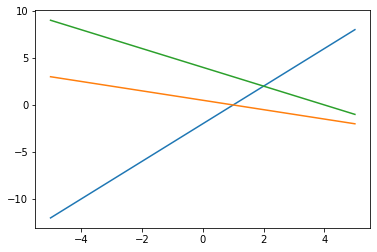

In [8]:
x=np.linspace(-5,5,100000)
l1= (lambda x: 2*x  -2)
l2= (lambda x: (1-x)/2)
l3= (lambda x: 4-x)
plt.plot(x,l1(x))
plt.plot(x,l2(x))
plt.plot(x,l3(x))

6.

7.